# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Sumber Dataset: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv("../Lung_Cancer_Raw/cancer patient data sets.csv")
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

**Insigth**

- Dataset Memiliki 1000 baris dan 26 kolom(fitur + target)
- kolom  level adalah targer dengan nilai Low, Medium, High
- kolom index dan Patient Id tidak relevan untuk modeling

In [8]:
#check 'Column name','Total number of column' & data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [9]:
#check (first five rows) data's from DataFrame

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [10]:
#check empty data's available or not 

df.isnull().sum().sum()

np.int64(0)

In [11]:
#check any duplicate data's present in the DataFrame
df.duplicated().sum()

np.int64(0)

In [12]:
#check unique(repeated)parameters in 'Level' column

df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

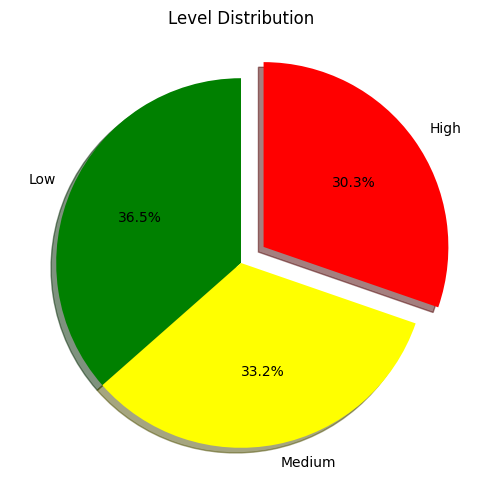

In [13]:
#check risk level
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.15)
plt.pie(df['Level'].value_counts(), 
        labels=df['Level'].unique(), 
        explode=explode, autopct='%1.1f%%', 
        shadow=True, startangle=90, 
        colors=['green', 'yellow', 'red'])
plt.title('Level Distribution')
plt.show()

In [14]:
#Each individual column(independent variables) influenced in target column(dependent variables) 
# function for bar plotting
def occ_cht(col, df=df):
    return df.groupby(col)['Level'].value_counts(normalize=True).unstack().plot(kind='bar', title = (f'Lungs Disease Based on {col}'), figsize=(12,5))

<Axes: title={'center': 'Lungs Disease Based on Age'}, xlabel='Age'>

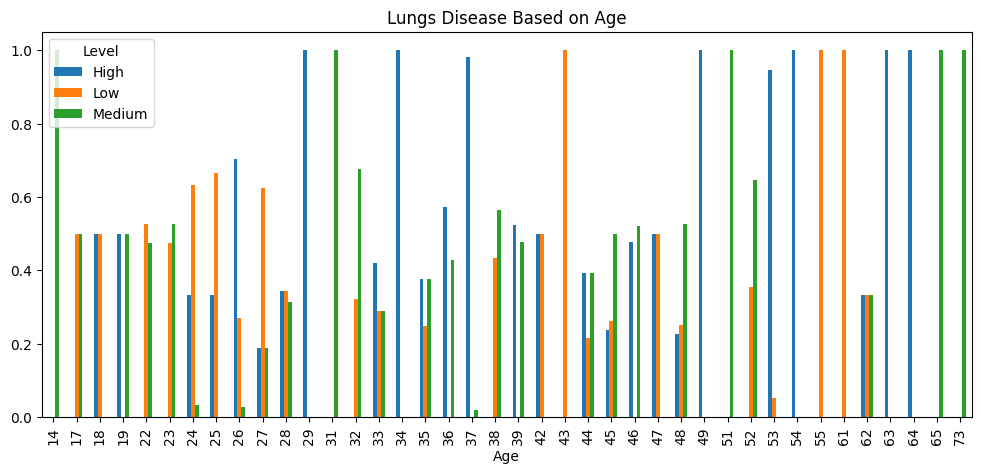

In [15]:
occ_cht('Age')

<Axes: title={'center': 'Lungs Disease Based on Gender'}, xlabel='Gender'>

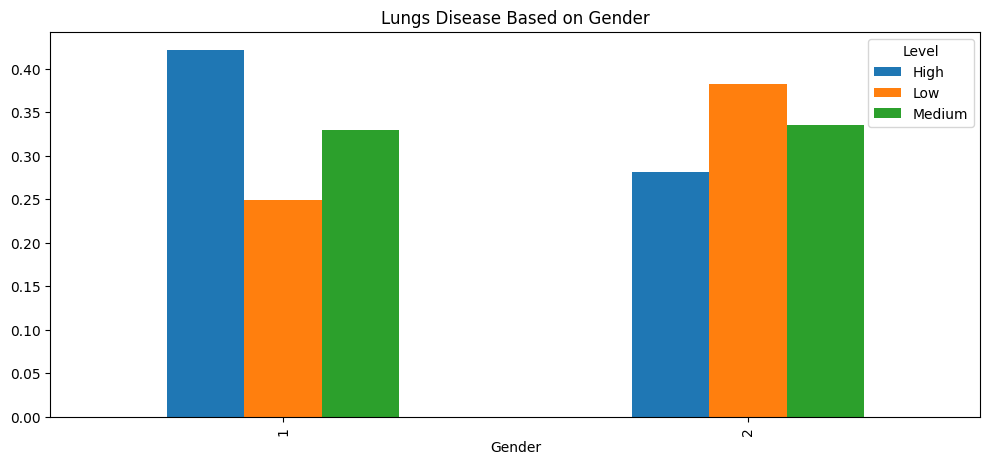

In [16]:
occ_cht('Gender')

<Axes: title={'center': 'Lungs Disease Based on Air Pollution'}, xlabel='Air Pollution'>

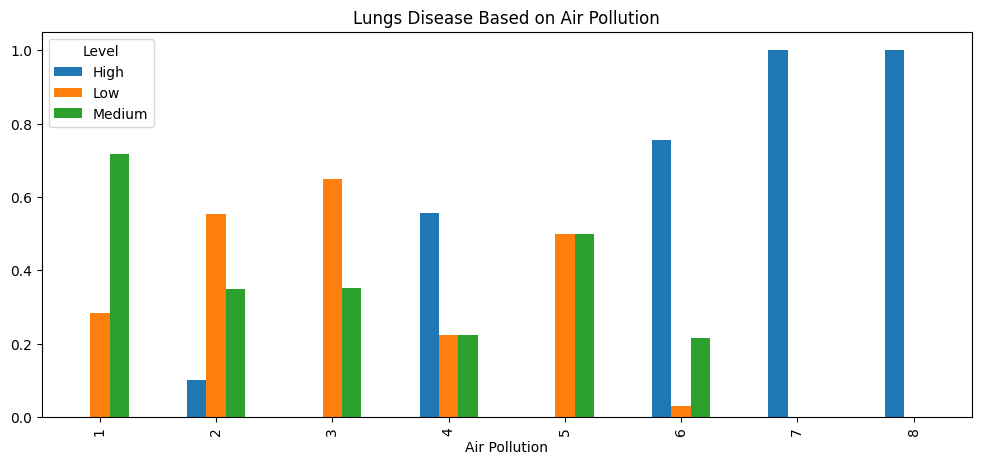

In [17]:
occ_cht('Air Pollution')

<Axes: title={'center': 'Lungs Disease Based on Alcohol use'}, xlabel='Alcohol use'>

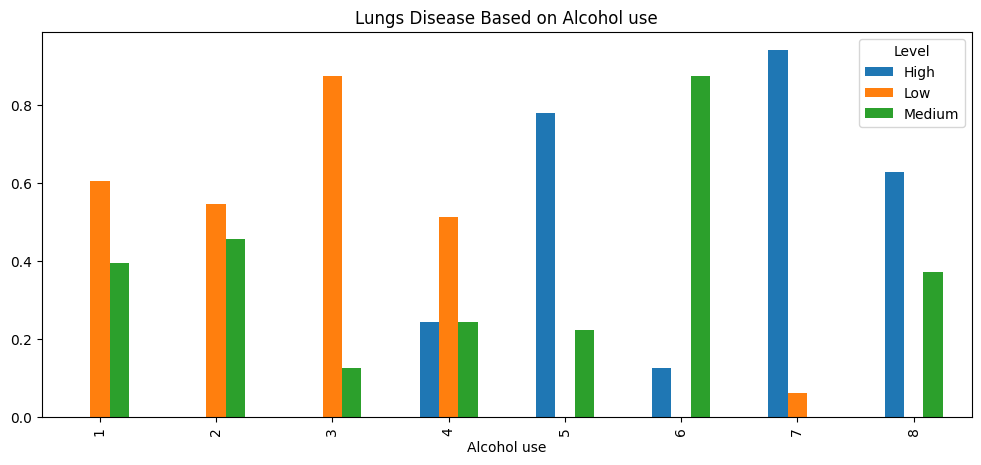

In [18]:
occ_cht('Alcohol use')

<Axes: title={'center': 'Lungs Disease Based on Dust Allergy'}, xlabel='Dust Allergy'>

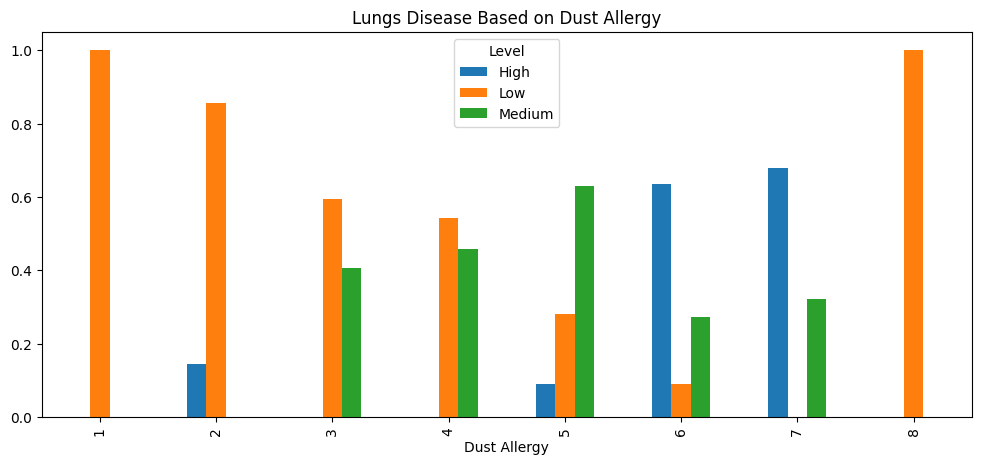

In [19]:
occ_cht('Dust Allergy')

<Axes: title={'center': 'Lungs Disease Based on OccuPational Hazards'}, xlabel='OccuPational Hazards'>

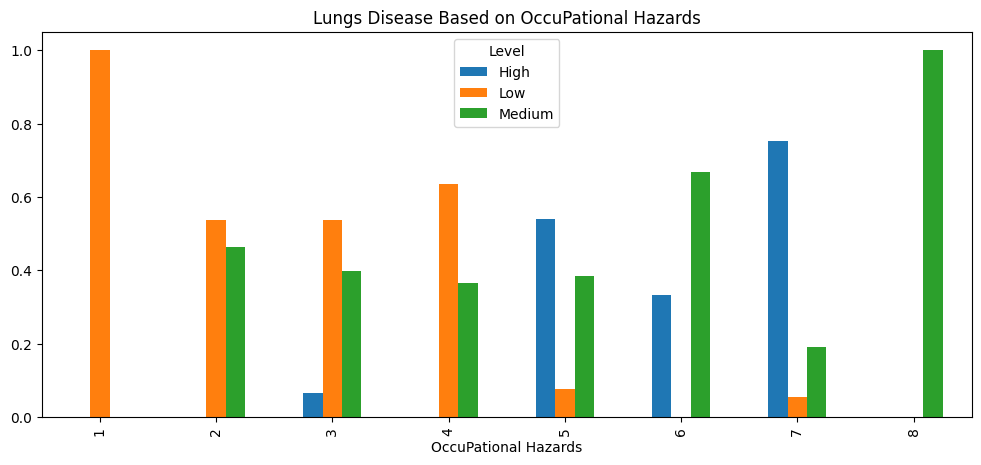

In [20]:
occ_cht('OccuPational Hazards')

<Axes: title={'center': 'Lungs Disease Based on Genetic Risk'}, xlabel='Genetic Risk'>

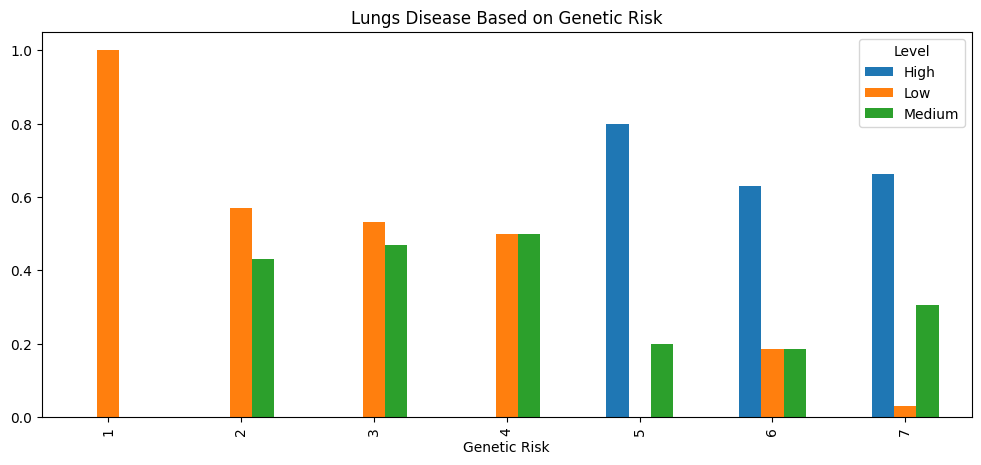

In [21]:
occ_cht('Genetic Risk')

<Axes: title={'center': 'Lungs Disease Based on chronic Lung Disease'}, xlabel='chronic Lung Disease'>

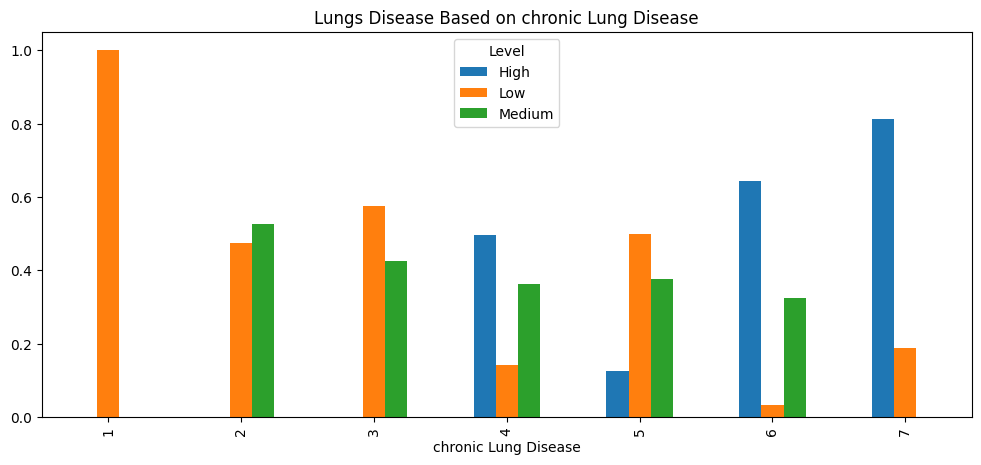

In [22]:
occ_cht('chronic Lung Disease')

<Axes: title={'center': 'Lungs Disease Based on Balanced Diet'}, xlabel='Balanced Diet'>

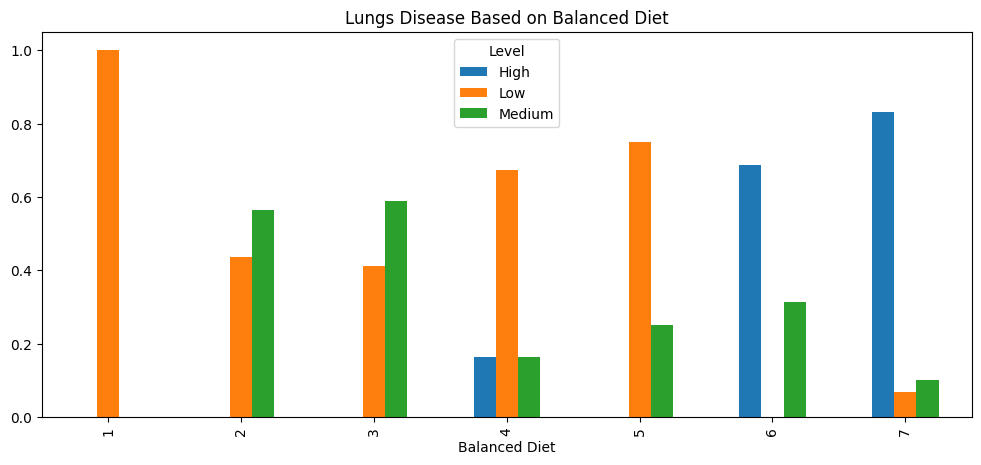

In [23]:
occ_cht('Balanced Diet')

<Axes: title={'center': 'Lungs Disease Based on Obesity'}, xlabel='Obesity'>

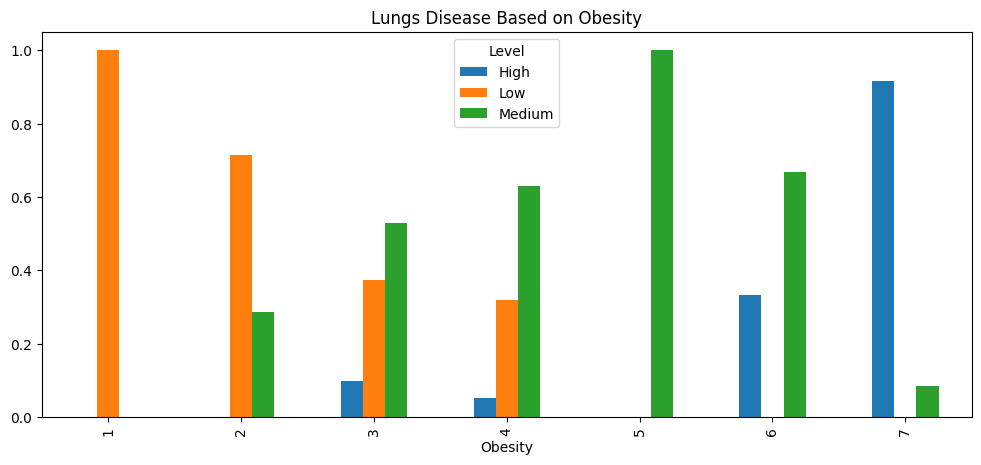

In [24]:
occ_cht('Obesity')

<Axes: title={'center': 'Lungs Disease Based on Smoking'}, xlabel='Smoking'>

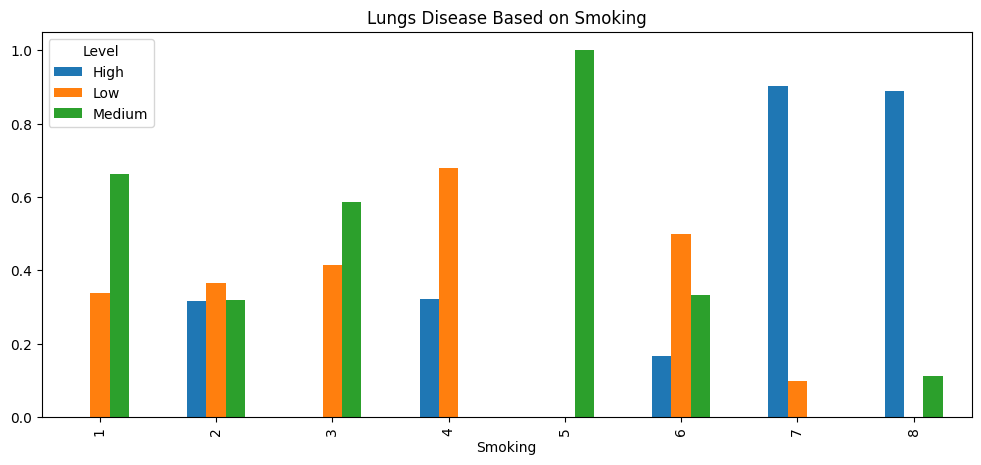

In [25]:
occ_cht('Smoking')

<Axes: title={'center': 'Lungs Disease Based on Passive Smoker'}, xlabel='Passive Smoker'>

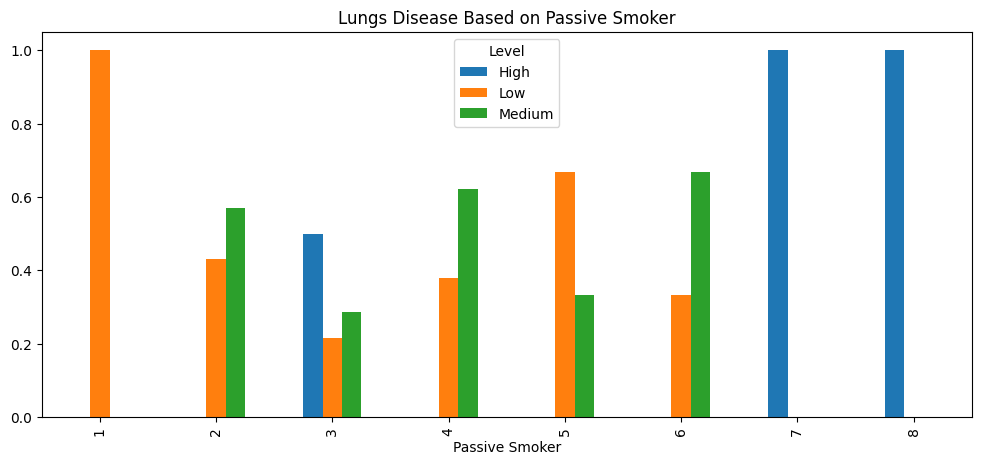

In [26]:
occ_cht('Passive Smoker')

<Axes: title={'center': 'Lungs Disease Based on Chest Pain'}, xlabel='Chest Pain'>

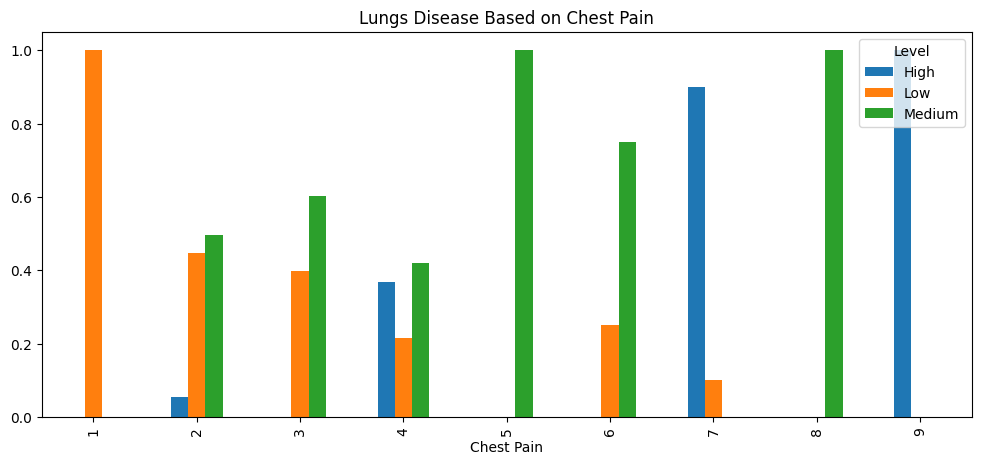

In [27]:
occ_cht('Chest Pain')

<Axes: title={'center': 'Lungs Disease Based on Coughing of Blood'}, xlabel='Coughing of Blood'>

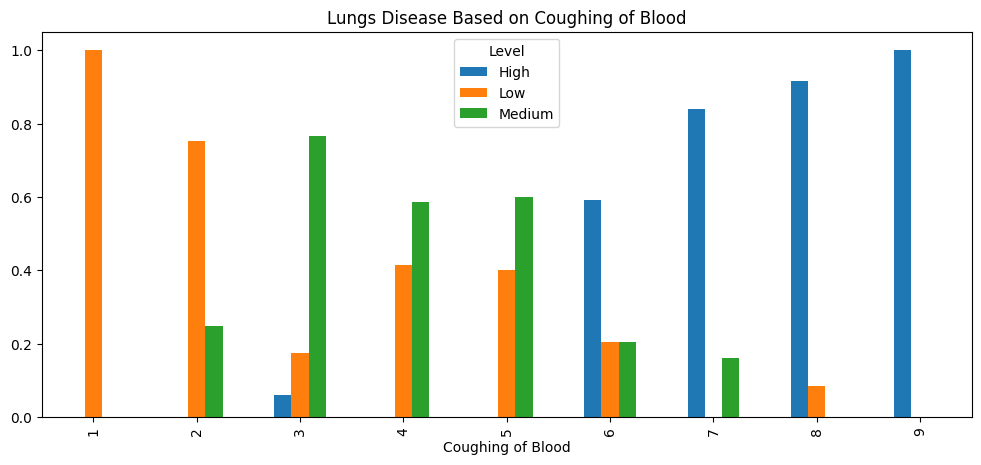

In [28]:
occ_cht('Coughing of Blood')

<Axes: title={'center': 'Lungs Disease Based on Fatigue'}, xlabel='Fatigue'>

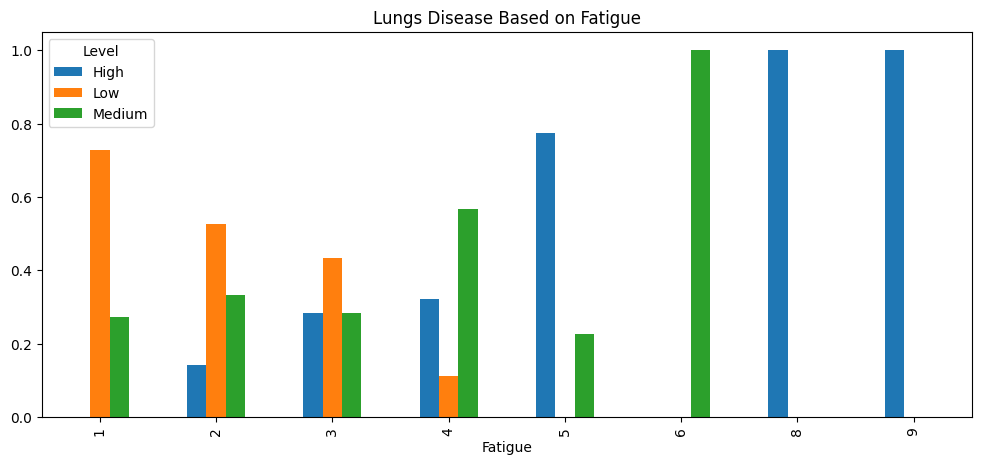

In [29]:
occ_cht('Fatigue')

<Axes: title={'center': 'Lungs Disease Based on Weight Loss'}, xlabel='Weight Loss'>

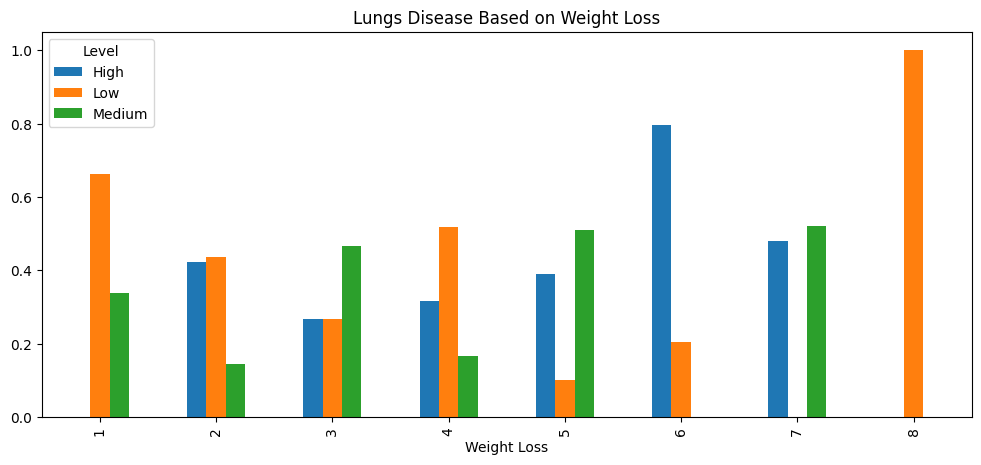

In [30]:
occ_cht('Weight Loss')

<Axes: title={'center': 'Lungs Disease Based on Shortness of Breath'}, xlabel='Shortness of Breath'>

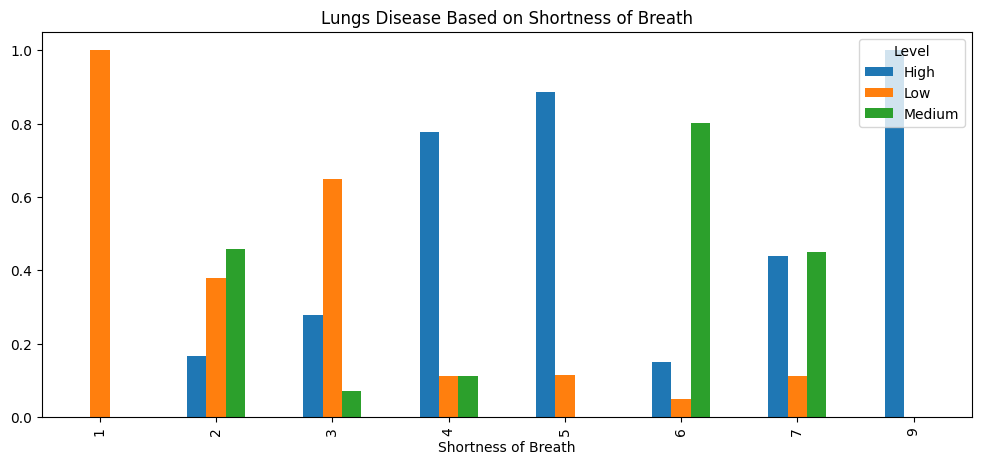

In [31]:
occ_cht('Shortness of Breath')

<Axes: title={'center': 'Lungs Disease Based on Wheezing'}, xlabel='Wheezing'>

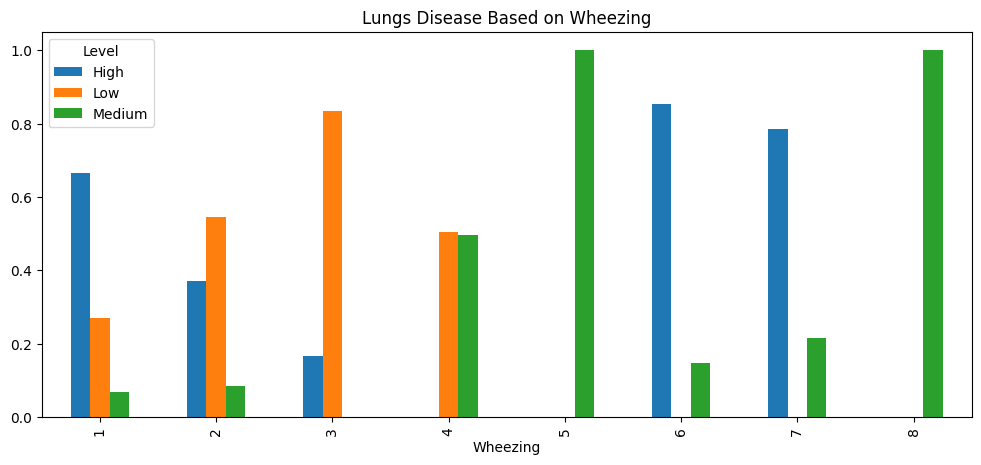

In [32]:
occ_cht('Wheezing')

<Axes: title={'center': 'Lungs Disease Based on Swallowing Difficulty'}, xlabel='Swallowing Difficulty'>

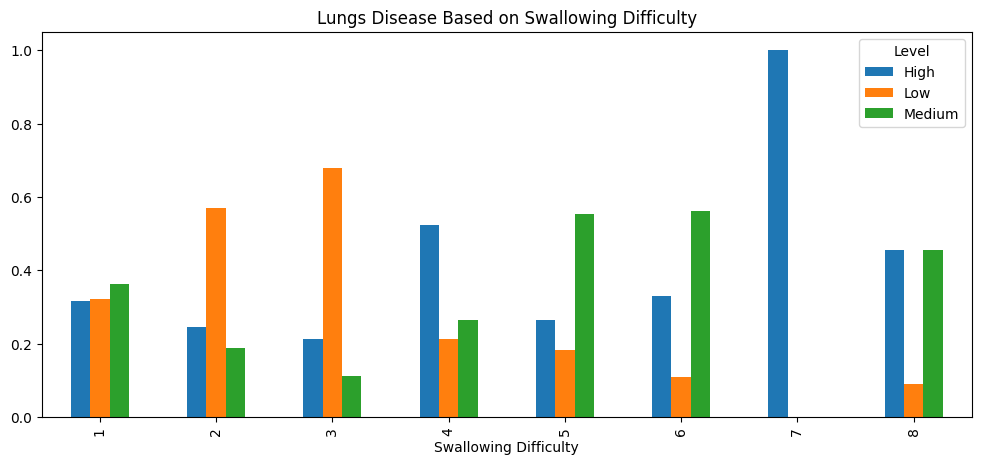

In [33]:
occ_cht('Swallowing Difficulty')

<Axes: title={'center': 'Lungs Disease Based on Clubbing of Finger Nails'}, xlabel='Clubbing of Finger Nails'>

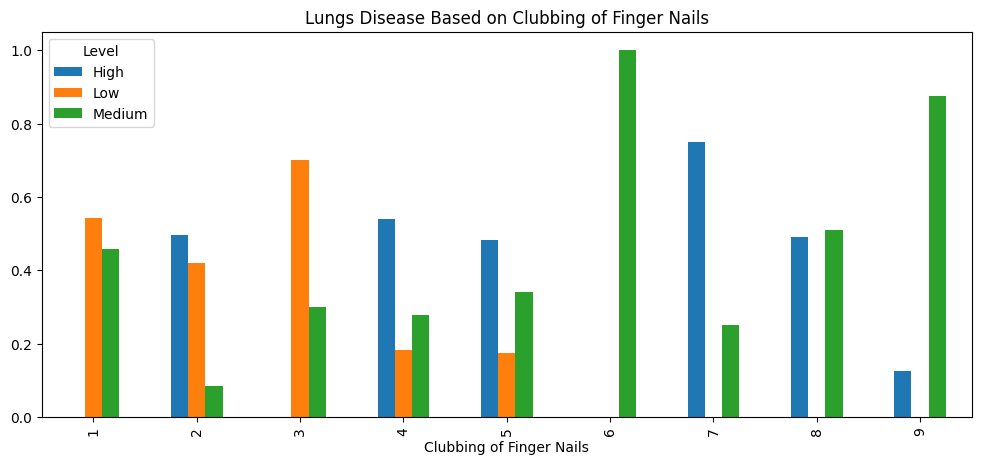

In [34]:
occ_cht('Clubbing of Finger Nails')

<Axes: title={'center': 'Lungs Disease Based on Frequent Cold'}, xlabel='Frequent Cold'>

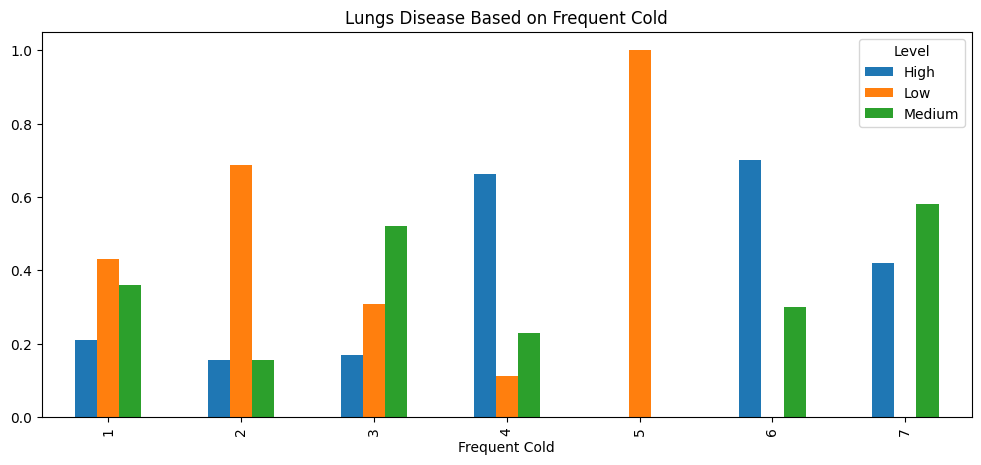

In [35]:
occ_cht('Frequent Cold')

<Axes: title={'center': 'Lungs Disease Based on Dry Cough'}, xlabel='Dry Cough'>

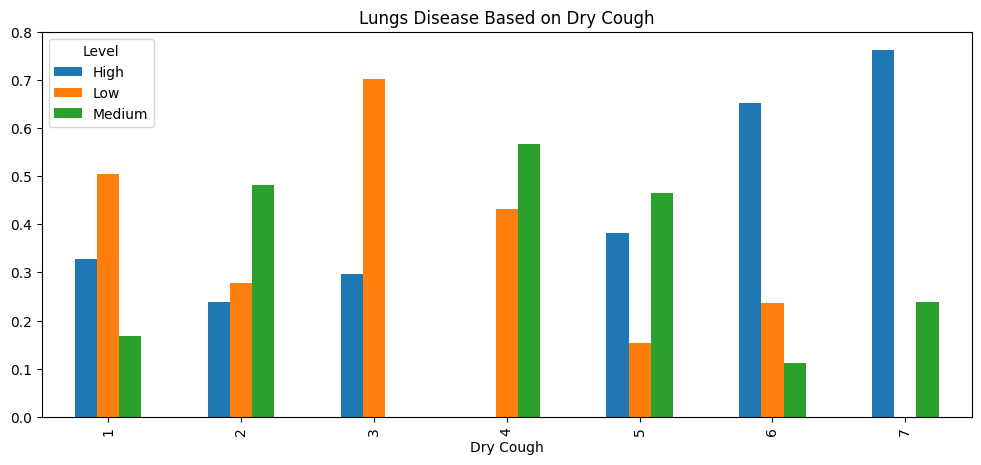

In [36]:
occ_cht('Dry Cough')

<Axes: title={'center': 'Lungs Disease Based on Snoring'}, xlabel='Snoring'>

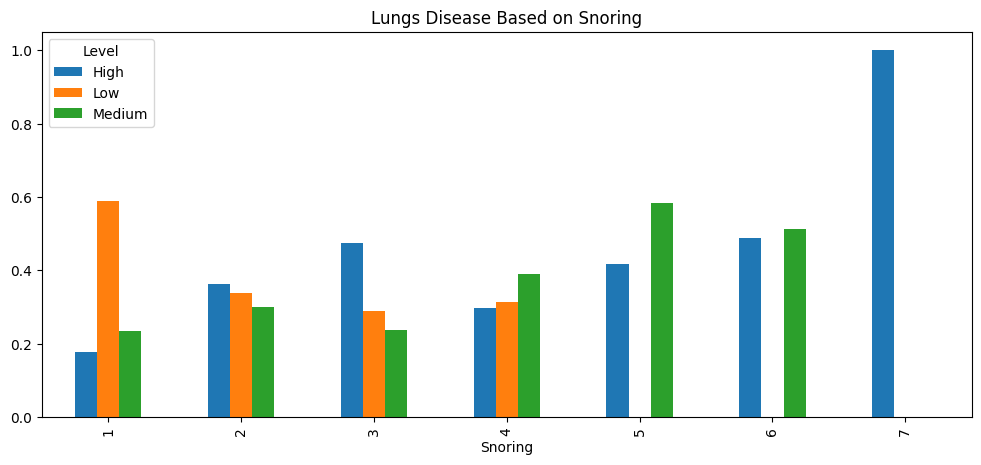

In [37]:
occ_cht('Snoring')

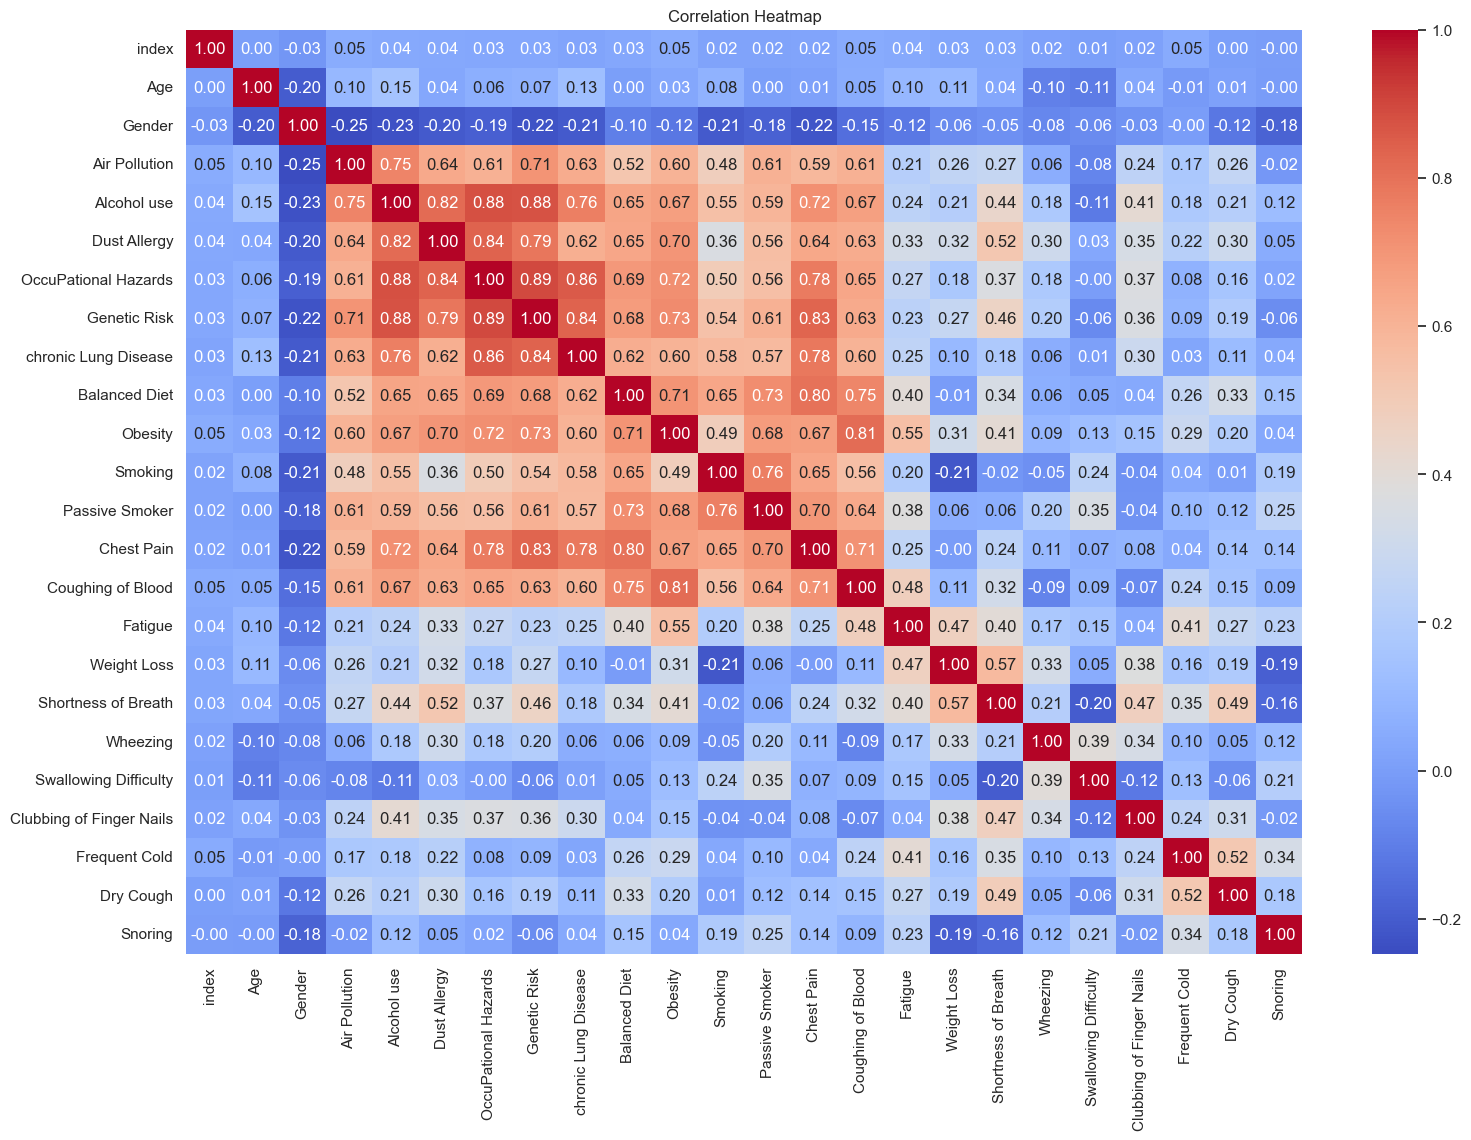

In [39]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## *Data Cleaning dan Transformasi*

Pada bagian ini, dilakukan pembersihan data seperti menghapus kolom yang tidak relevan dan mengubah label target menjadi nilai numerik agar siap digunakan untuk pemodelan machine learning.


In [40]:
#remove unwanted columns from DataFrame

df = df.drop(columns = ['Patient Id', 'index'])

In [41]:
#Change cancer levels from Objective(str) to numeric values by Mapping

mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(mapping, inplace=True)

#Display change of cancer level

df['Level'].unique()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20000\621880631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Level"].replace(mapping, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20000\621880631.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Level"].replace(mapping, in

array([0, 1, 2])

## *Pemisahan Fitur dan Target*

Pada bagian ini, data telah dipisahkan menjadi variabel fitur (`X`) dan target (`y`). Selanjutnya, data dibagi menjadi data latih (`X_train`, `y_train`) dan data uji (`X_test`, `y_test`) untuk keperluan pelatihan dan evaluasi model machine learning.

In [43]:

X = df.drop('Level', axis=1)
y = df['Level']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## *Standarisasi Fitur*

Pada tahap ini, fitur-fitur pada data latih (`X_train`) dan data uji (`X_test`) telah distandarisasi menggunakan StandardScaler agar memiliki distribusi nilai dengan rata-rata 0 dan standar deviasi 1. Standarisasi ini penting untuk memastikan setiap fitur memiliki kontribusi yang seimbang dalam proses pelatihan model machine learning.

In [45]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)